In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("data/Employee-Attrition.csv")

In [40]:
pd.options.display.max_columns = None
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Preprocessing**

In [7]:
#Binary Encoding : Attrition, Gender, Over18, OverTime

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == "Y" else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == "Male" else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == "Yes" else 0)

In [8]:
# One-Hot Encoding : Department, EducationField, JobRole, MaritalStatus, BusinessTravel

df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='Education')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix='Department')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='JobRole')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='Status')).drop('MaritalStatus', axis=1)

In [9]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,...,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,...,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,...,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,True,False,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,1,2062,4,1,42,...,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,1,2064,2,1,87,...,False,False,True,False,False,False,False,False,True,False
1468,49,0,1023,2,3,1,2065,4,1,63,...,False,False,False,False,False,True,False,False,True,False


In [10]:
df = df.map(lambda x: 1 if x == True else 0 if x == False else x) 

In [11]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,...,0,0,0,0,0,1,0,0,1,0


In [12]:
df = df.drop('EmployeeNumber', axis=1)

In [13]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,3,1,41,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,4,1,42,2,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2,1,87,4,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,4,1,63,2,...,0,0,0,0,0,1,0,0,1,0


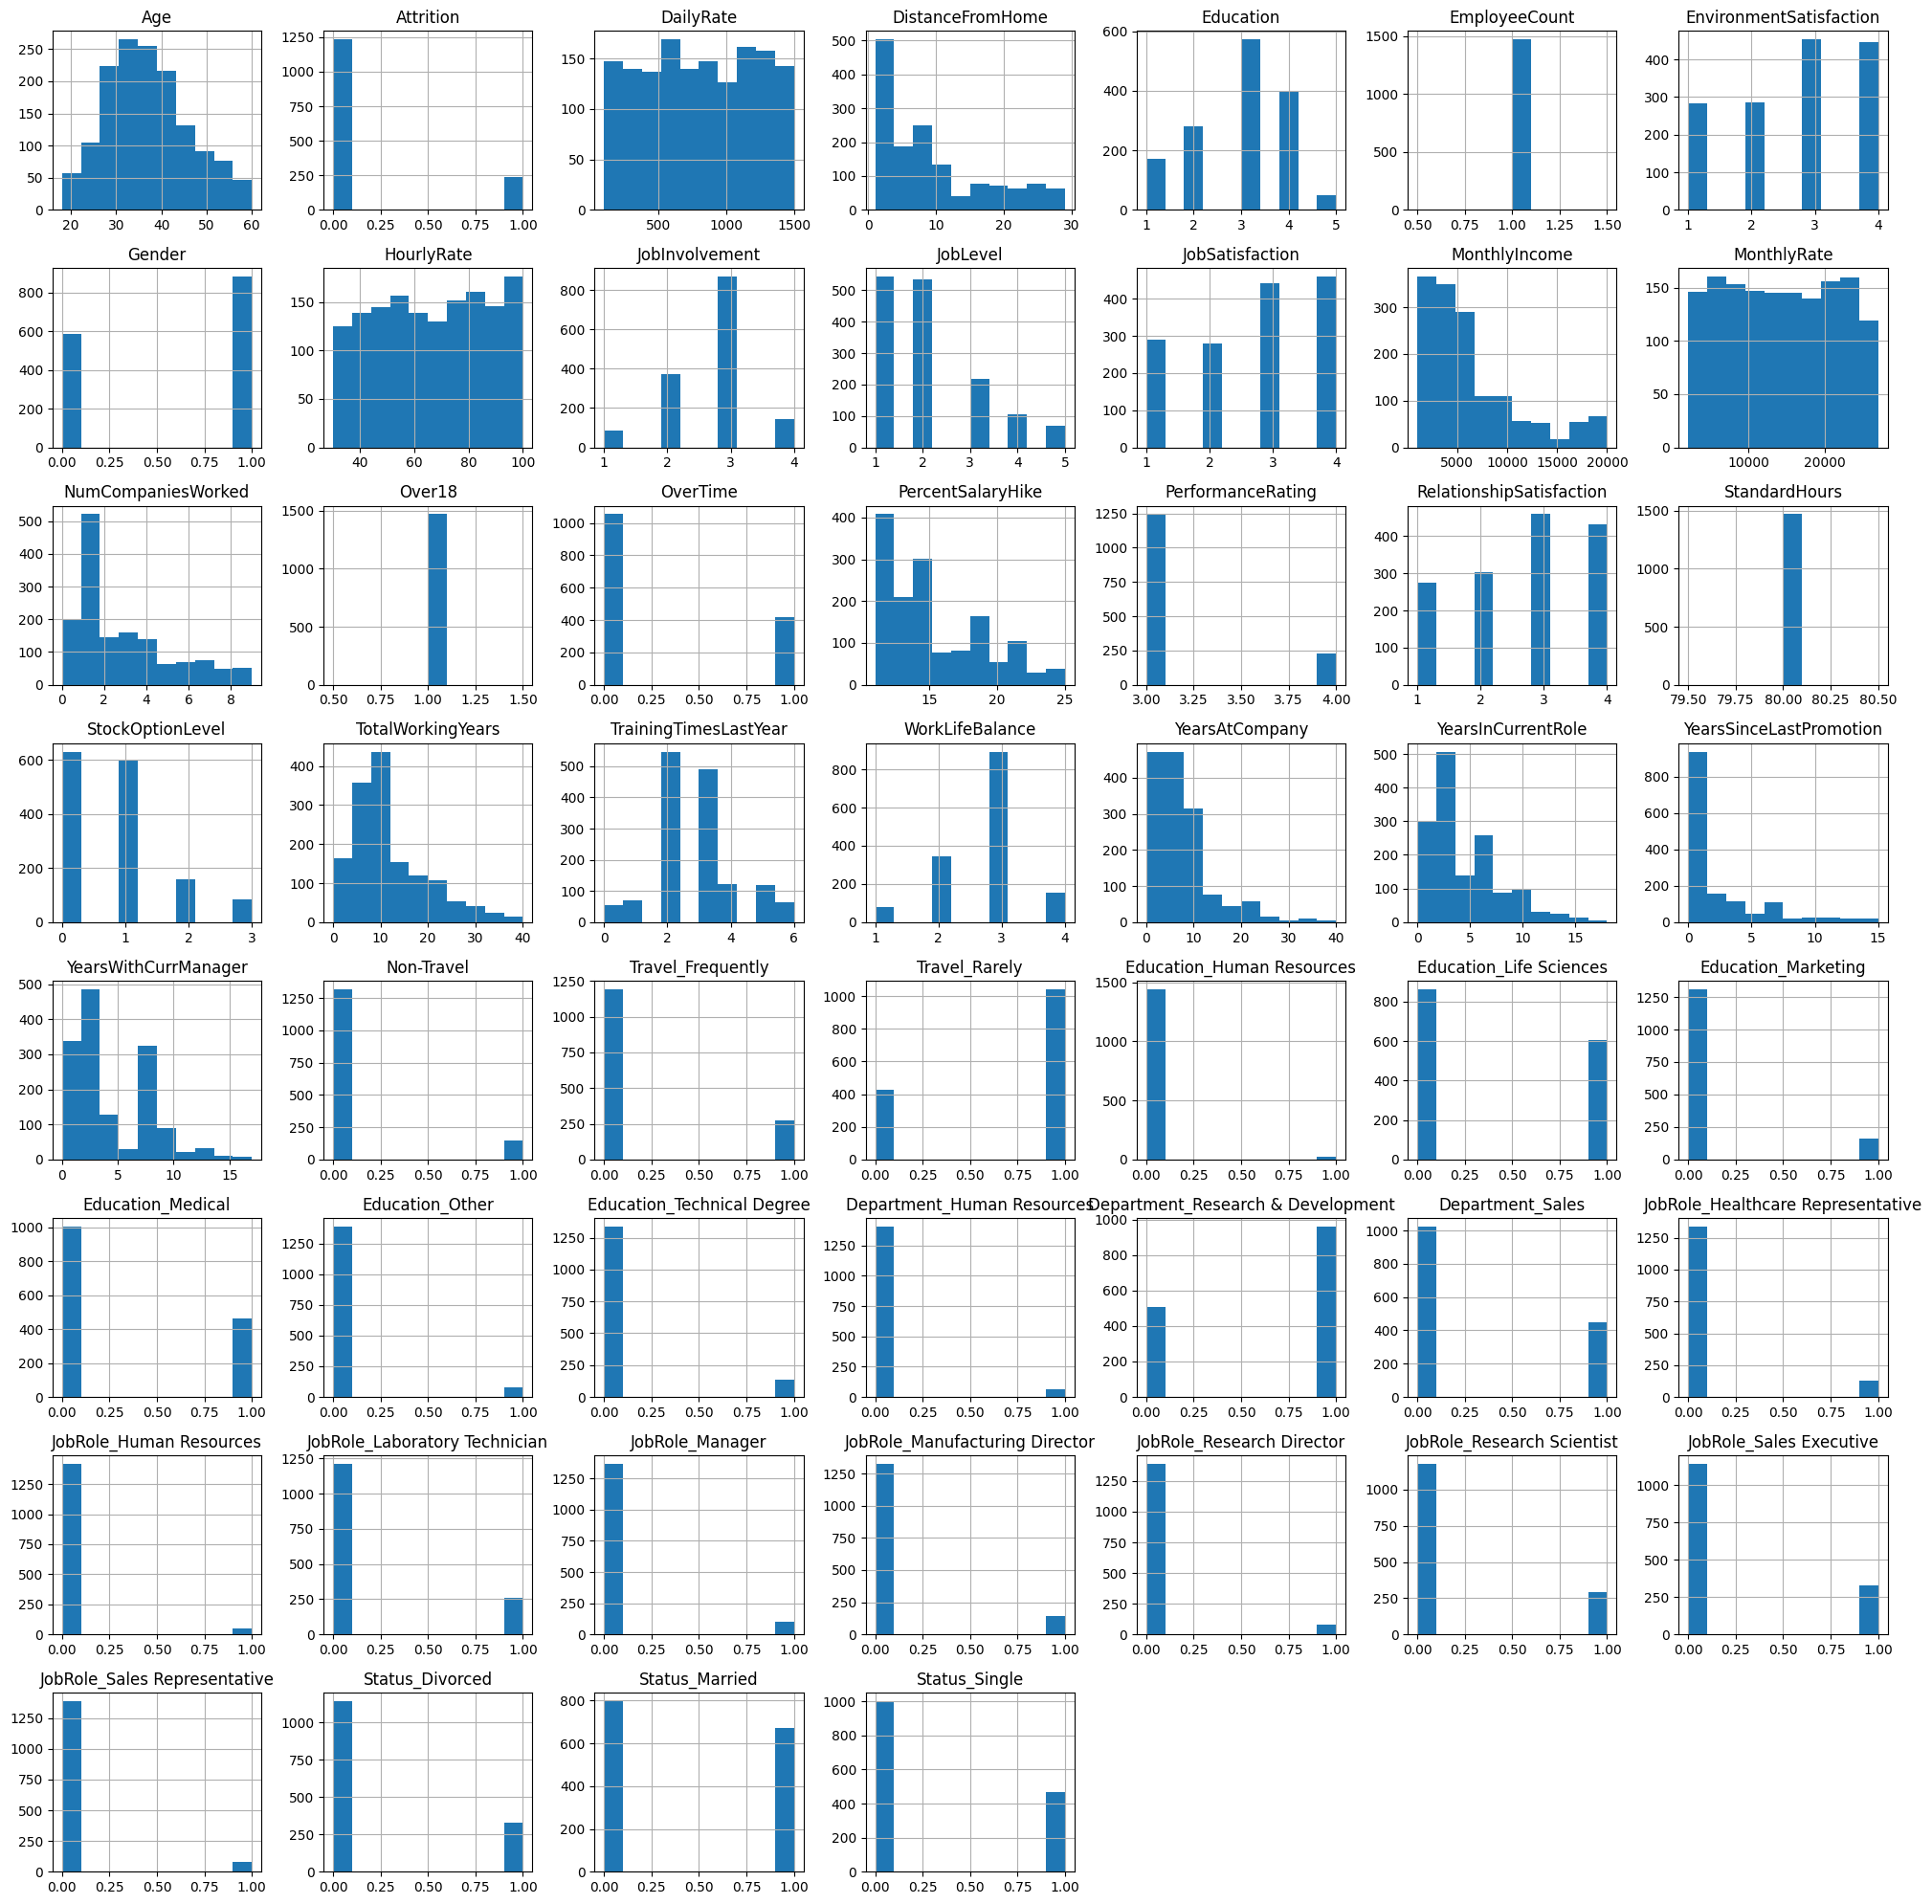

In [14]:
import matplotlib.pyplot as plt

df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

In [15]:
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

In [16]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,...,0,0,0,0,0,1,0,0,1,0


**Model Training**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = df.drop('Attrition', axis=1), df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
rf.score(x_test, y_test)

0.8707482993197279

In [19]:
sorted_features = dict(sorted(zip(rf.feature_names_in_, rf.feature_importances_), key = lambda x: x[1], reverse=True))

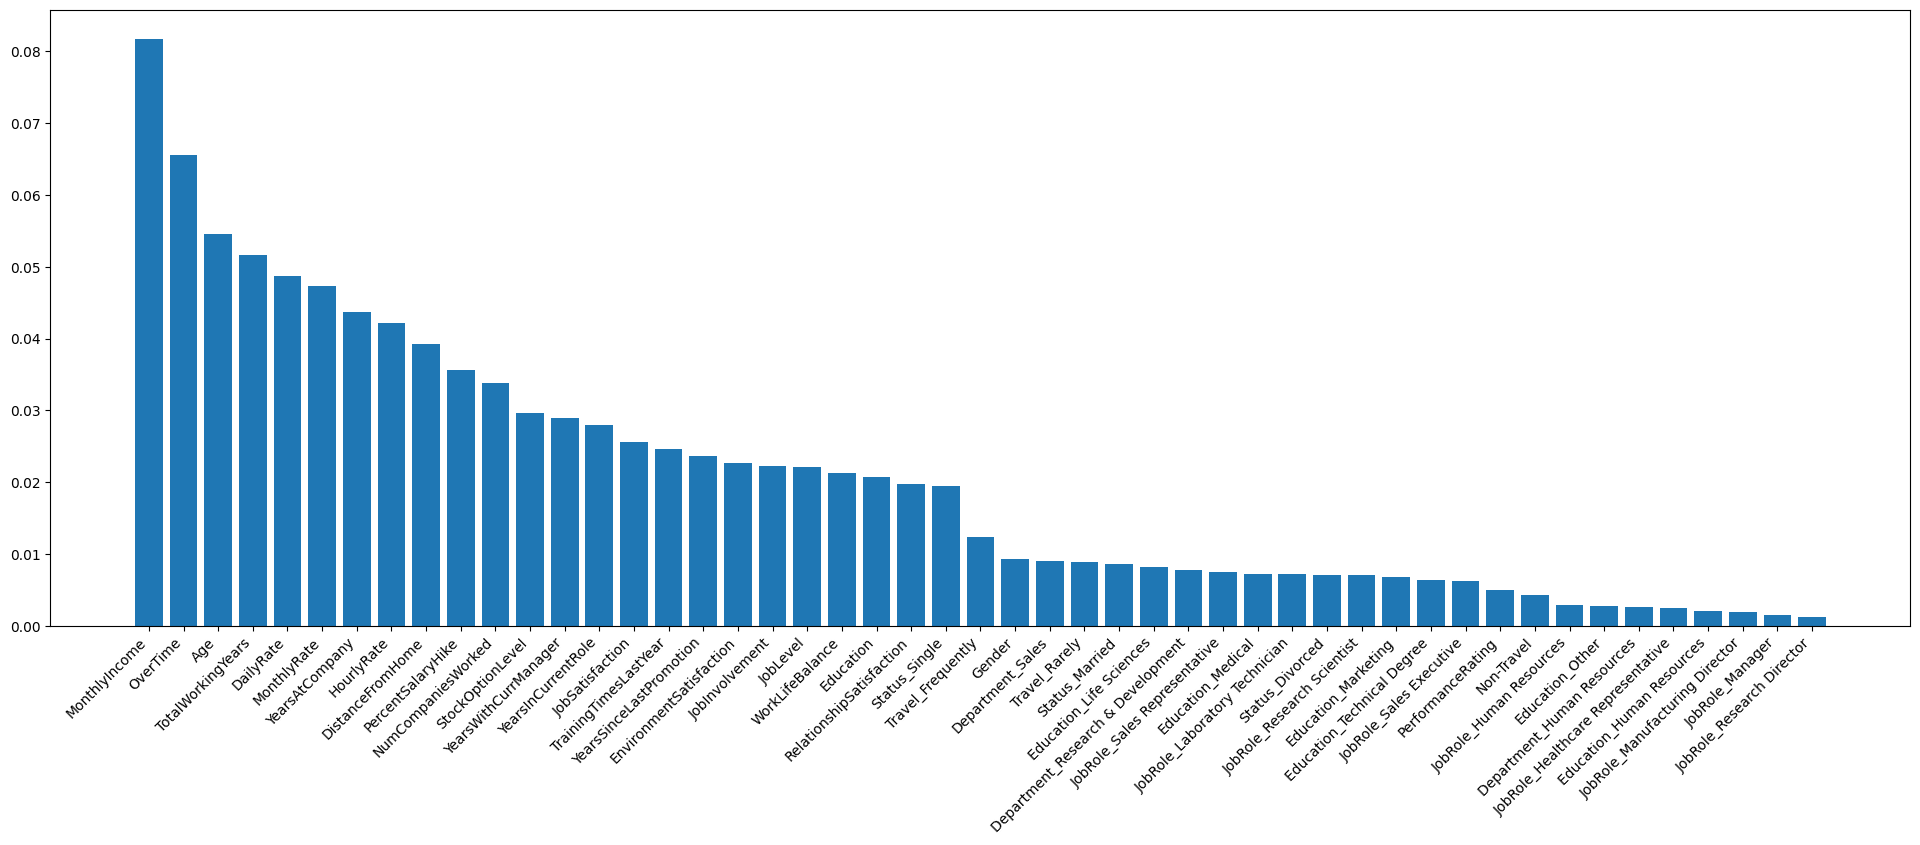

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
plt.bar(sorted_features.keys(), sorted_features.values())
plt.xticks(rotation=45, ha='right')
plt.show()

In [89]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294



In [26]:
print(confusion_matrix(y_test, y_pred))

[[253   2]
 [ 36   3]]


In [27]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [ ]:
cleaned_data = df.to_csv("cleaned_data.csv", index=False)

In [33]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [37]:
df1 = pd.read_csv("cleaned_data.csv")

In [38]:
target = "PerformanceRating"
X = df.drop(columns=["Attrition", target], errors="ignore")
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [40]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight="balanced"
)


In [41]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

CV Accuracy: 1.000 (+/- 0.000)


In [42]:
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       249
           4       1.00      1.00      1.00        45

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [44]:
joblib.dump(model, "perf_model.pkl")
print("Model saved as perf_model.pkl")

Model saved as perf_model.pkl
